# This notebook illustrates the Gaussian Process Regression

In [1]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.animation import FuncAnimation

from InfoGrad import InfoGrad
from IPython.display import HTML

import pickle as pkl

%load_ext autoreload
%autoreload 2

In [2]:
# The underlying function
def f(X,Y):
    return -(np.exp(-2*(X+1.5)**2 - 0.3*(Y+1.5)**2-0.3*X*Y+0.4)+np.exp(-(X-0.5)**2 - (Y-1.2)**2-0.6*X*Y)+np.exp(-0.7*(X-1.5)**2 - 0.3*(Y+1.5)**2-0.*X*Y))


In [38]:
def animate_hist(mode,X,Y,n_0,n_robot,mu_hist):
    
    
    N_frames = len(mu_hist)
   # Plot sample locations
    
    xlist = np.linspace(-1.0, 1.0, 100)
    ylist = np.linspace(-1.0, 1.0, 100)
    full_X,full_Y = np.meshgrid(xlist, ylist)

    
    fig=plt.figure(dpi=200)
    

    def update(i):
        fig.clf()
        
        # Plot underlying
#         plt.contourf(full_X, full_Y, f(full_X,full_Y),levels=9)
        if i<len(mu_hist):
            plt.contourf(full_X, full_Y, mu_hist[i].reshape(full_X.shape),levels=9)

#         ax.colorbar(cp) # Add a colorbar to a plot
         
        
        plt.scatter(X[:n_robot*i+n_0],Y[:n_robot*i+n_0],color = 'k',marker='+')


        plt.title(mode)
        plt.tight_layout()

    ani = FuncAnimation(fig, update, frames=range(N_frames),interval = 200)
    return ani

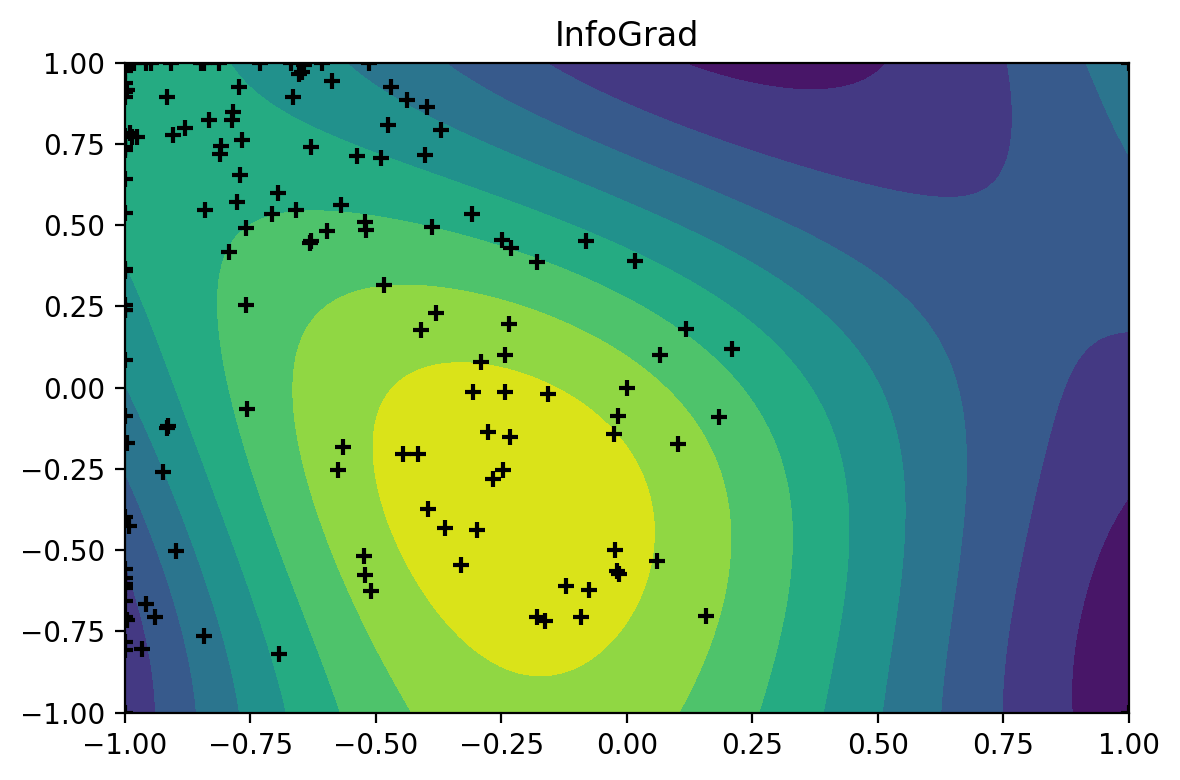

In [39]:
mode = 'InfoGrad'
with open('{}2D.pkl'.format(mode),'rb') as file:
    data = pkl.load(file)

X = data['X'][:,0]
Y = data['X'][:,1]
ani = animate_hist(mode,X,Y,data['n_0'],data['n_robot'],data['mu_hist'])
# ani.save('{}.gif'.format(mode), writer='imagemagick', fps=2)
ani.save('{}.mp4'.format(mode))

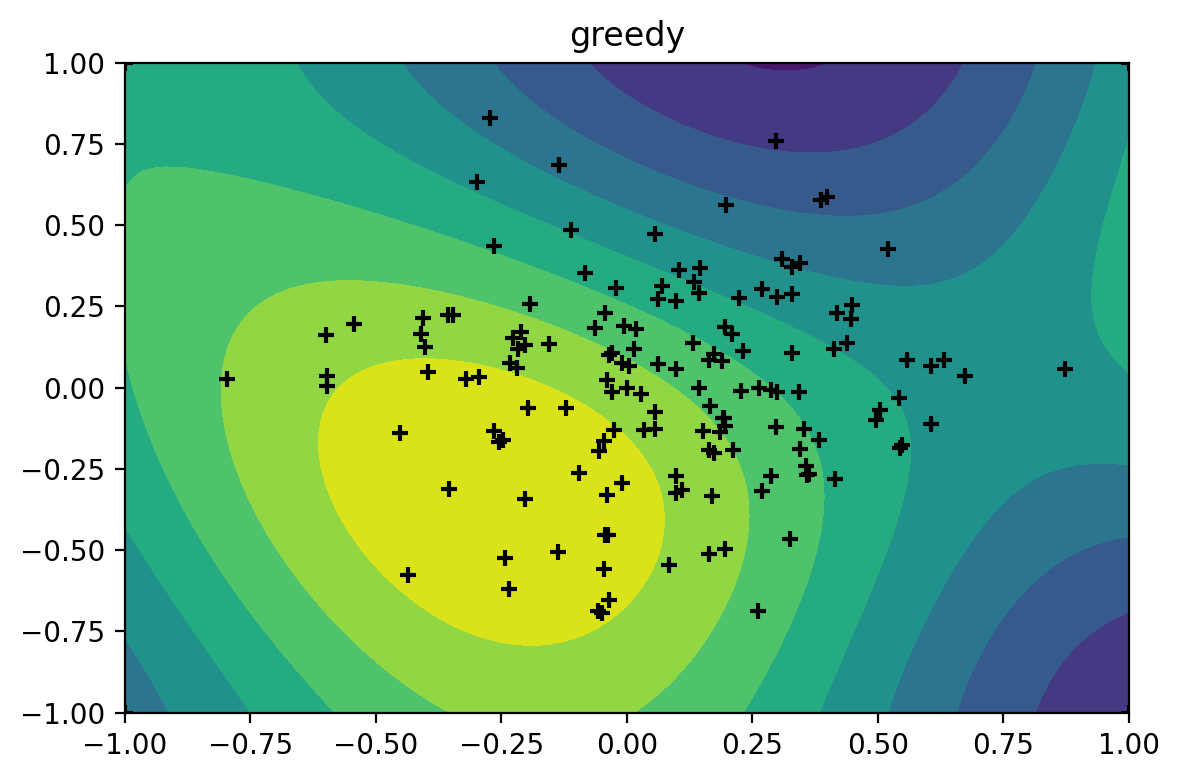

In [40]:
mode = 'greedy'
with open('{}2D.pkl'.format(mode),'rb') as file:
    data = pkl.load(file)

X = data['X'][:,0]
Y = data['X'][:,1]

ani = animate_hist(mode,X,Y,data['n_0'],data['n_robot'],data['mu_hist'])
# ani.save('{}.gif'.format(mode), writer='imagemagick', fps=2)
ani.save('{}.mp4'.format(mode))

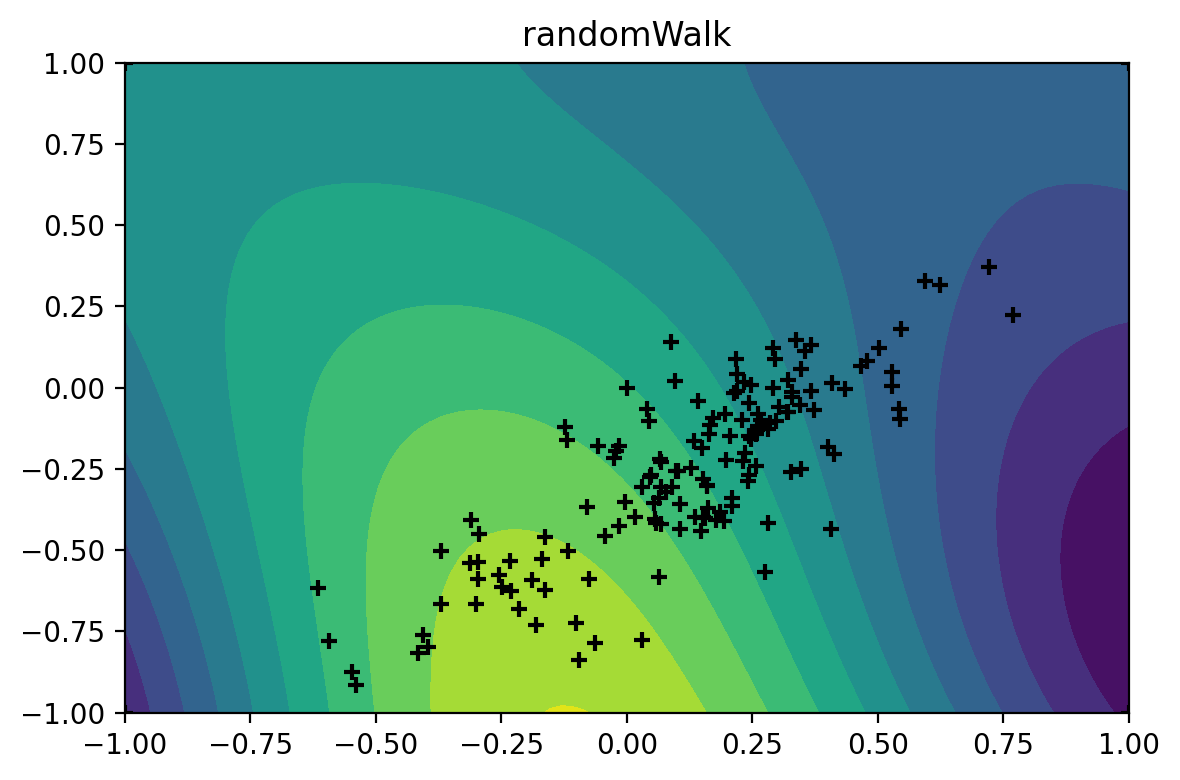

In [41]:
mode = 'randomWalk'
with open('{}2D.pkl'.format(mode),'rb') as file:
    data = pkl.load(file)

X = data['X'][:,0]
Y = data['X'][:,1]

ani = animate_hist(mode,X,Y,data['n_0'],data['n_robot'],data['mu_hist'])
# ani.save('{}.gif'.format(mode), writer='imagemagick', fps=2)
ani.save('{}.mp4'.format(mode))

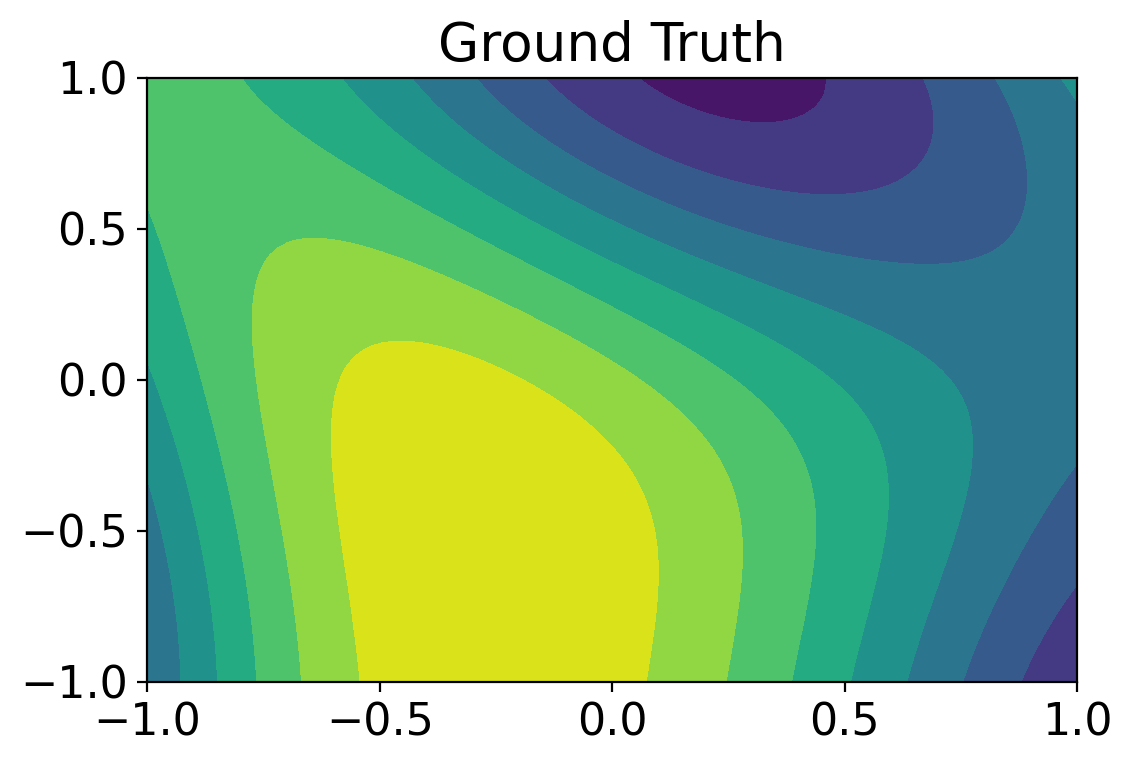

In [10]:
xlist = np.linspace(-1.0, 1.0, 100)
ylist = np.linspace(-1.0, 1.0, 100)
full_X,full_Y = np.meshgrid(xlist, ylist)


fig=plt.figure(dpi=200)

plt.contourf(full_X, full_Y, f(full_X,full_Y),levels=9)
plt.title("Ground Truth")
plt.savefig('GroundTruth2D.png')
plt.show()

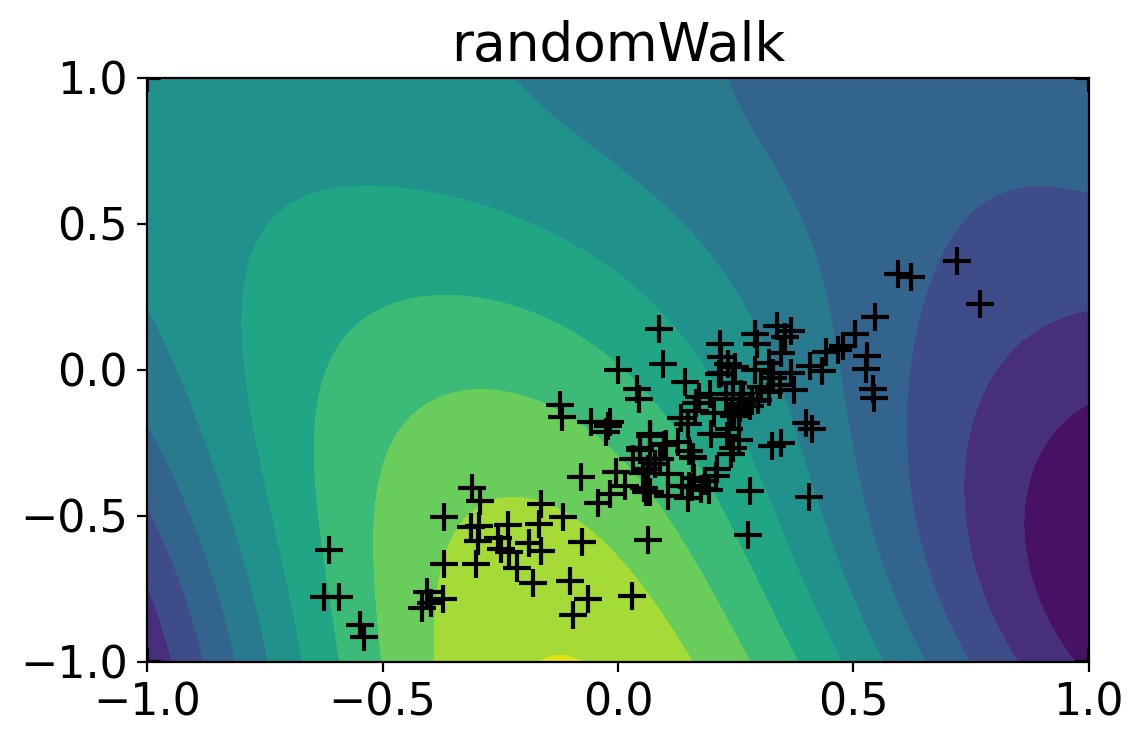

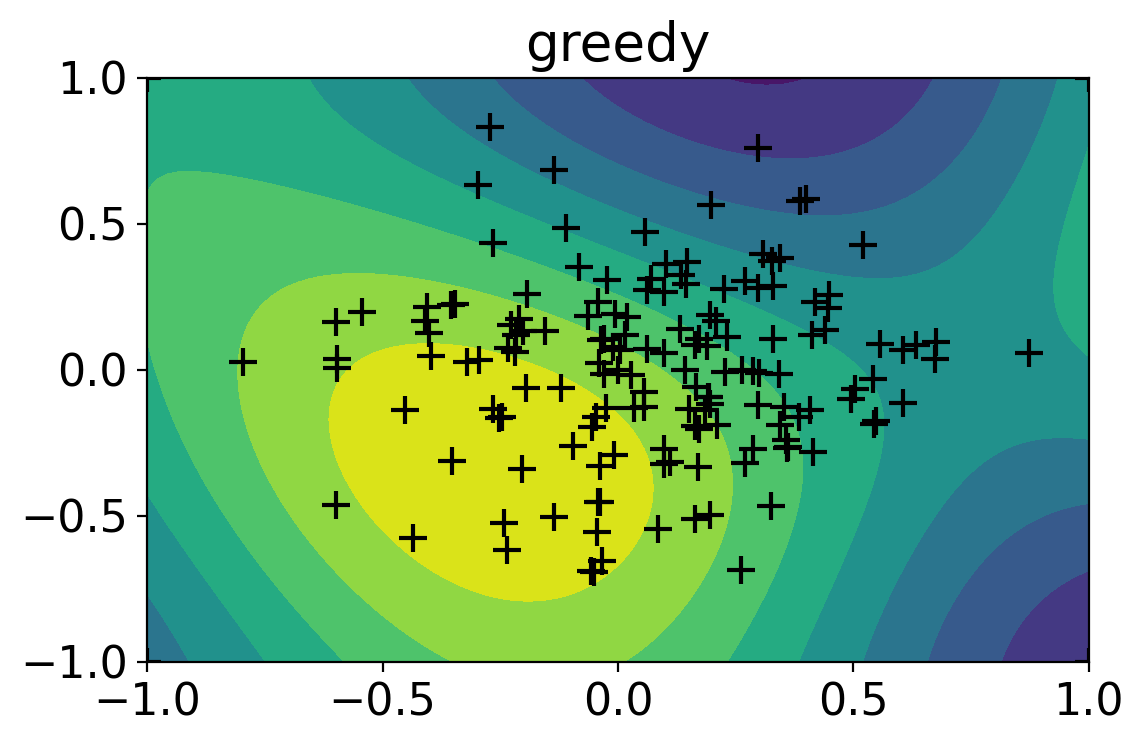

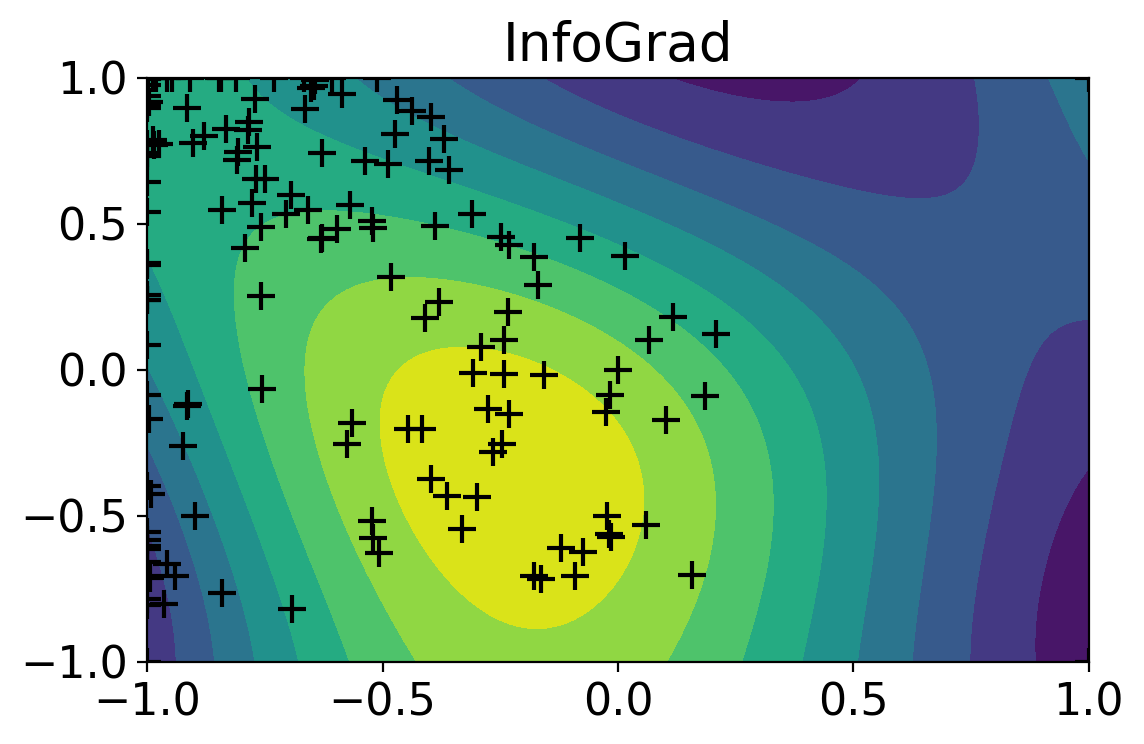

In [9]:
plt.rc('font',size=16)
# Plot sample locations

xlist = np.linspace(-1.0, 1.0, 100)
ylist = np.linspace(-1.0, 1.0, 100)
full_X,full_Y = np.meshgrid(xlist, ylist)

for mode in ['randomWalk','greedy','InfoGrad']:
    with open('{}2D.pkl'.format(mode),'rb') as file:
        data = pkl.load(file)
    
    
    
    X = data['X'][:,0]
    Y = data['X'][:,1]

    fig=plt.figure(dpi=200)
    

    plt.contourf(full_X, full_Y, data['mu_hist'][-1].reshape(full_X.shape),levels=9)


    plt.scatter(X,Y,s=100,color = 'k',marker='+')


    plt.title(mode)
    plt.tight_layout()
    plt.savefig('{}2D.png'.format(mode))

